##### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,[4]].values

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred) 
cm

array([[77,  8],
       [ 9, 40]])

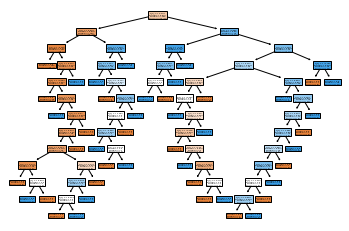

In [10]:
import sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
plot_tree(classifier, filled=True)
plt.show()



In [22]:
from sklearn.ensemble import RandomForestClassifier
rclassifier = RandomForestClassifier(n_estimators=10,criterion = 'entropy',random_state=0)
rclassifier.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
y_pred1 = rclassifier.predict(X_test)

acc_randomF = round(metrics.accuracy_score(Y_test,y_pred1),2)
print("Accuracy with DecisionTree(Gini) classifier:-->",acc_randomF)

Accuracy with DecisionTree(Gini) classifier:--> 0.88


In [24]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1])

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred1)
cm

array([[78,  7],
       [ 9, 40]])

In [26]:
from sklearn.naive_bayes import GaussianNB
nbclassifier = GaussianNB()
nbclassifier.fit(X_train, Y_train)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
from sklearn import metrics 
y_pred = nbclassifier.predict(X_test)
acc_naiveB = round(metrics.accuracy_score(Y_test,y_pred),2)
print("Accuracy with NaiveBayes classifier:-->",acc_naiveB)

Accuracy with NaiveBayes classifier:--> 0.9


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred1)
cm

array([[78,  7],
       [ 9, 40]])

In [41]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',max_iter=500)
logreg.fit(X_train,Y_train)
y_pred = nbclassifier.predict(X_test)

y_pred_proba = logreg.predict_proba(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
print(y_pred_proba)

[[0.89124462 0.10875538]
 [0.82680904 0.17319096]
 [0.80911097 0.19088903]
 [0.9117147  0.0882853 ]
 [0.89723339 0.10276661]
 [0.99047055 0.00952945]
 [0.98171848 0.01828152]
 [0.32051853 0.67948147]
 [0.99374071 0.00625929]
 [0.48862212 0.51137788]
 [0.96090525 0.03909475]
 [0.96865676 0.03134324]
 [0.83477888 0.16522112]
 [0.64142004 0.35857996]
 [0.98439871 0.01560129]
 [0.69718585 0.30281415]
 [0.72789799 0.27210201]
 [0.98756598 0.01243402]
 [0.01521694 0.98478306]
 [0.95148637 0.04851363]
 [0.90495794 0.09504206]
 [0.04903838 0.95096162]
 [0.71719658 0.28280342]
 [0.13733582 0.86266418]
 [0.99460815 0.00539185]
 [0.03624247 0.96375753]
 [0.9245592  0.0754408 ]
 [0.92463629 0.07536371]
 [0.80495418 0.19504582]
 [0.84940874 0.15059126]
 [0.97987856 0.02012144]
 [0.71629862 0.28370138]
 [0.07248358 0.92751642]
 [0.84259855 0.15740145]
 [0.98446649 0.01553351]
 [0.99604921 0.00395079]
 [0.97990035 0.02009965]
 [0.92893292 0.07106708]
 [0.96875732 0.03124268]
 [0.43889714 0.56110286]


In [43]:
accuracy_logreg = round(metrics.accuracy_score(Y_test,y_pred),2)
print("Accuracy with Logistic Regression classifier:-->",accuracy_logreg)



Accuracy with Logistic Regression classifier:--> 0.9


In [44]:
score = logreg.score(X_test, Y_test)
print(score)

0.8731343283582089


In [45]:
from sklearn.svm import SVC

svc = SVC(gamma='scale')
svc.fit(X_train,Y_train)
y_pred_svc = svc.predict(X_test)

accuracy_svc = metrics.accuracy_score(Y_test,y_pred_svc)
print("Accuracy with SVM classifier:-->",accuracy_svc)

Accuracy with SVM classifier:--> 0.9104477611940298


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
